In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimgeonyu","key":"bfbdcd7b31bc168eddfae4e56bc4590e"}'}

In [2]:
# #json 파일 이동시키기.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 21.4MB/s]


In [4]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
!ls

gender_submission.csv  sample_data  titanic.zip
kaggle.json	       test.csv     train.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(font_scale = 2.5)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<ipython-input-6-466cd853fbfb>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [7]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
for col in df_train.columns:
  msg = "column : {:>10}\t Percent of NaN value : {:.2f}%".format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
  print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :   Survived	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 19.87%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.00%
column :      Cabin	 Percent of NaN value : 77.10%
column :   Embarked	 Percent of NaN value : 0.22%


In [13]:
for col in df_test.columns:
  msg = "column : {:>10}\t Percent of NaN value : {:.2f}%".format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 20.57%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.24%
column :      Cabin	 Percent of NaN value : 78.23%
column :   Embarked	 Percent of NaN value : 0.00%


<Axes: >

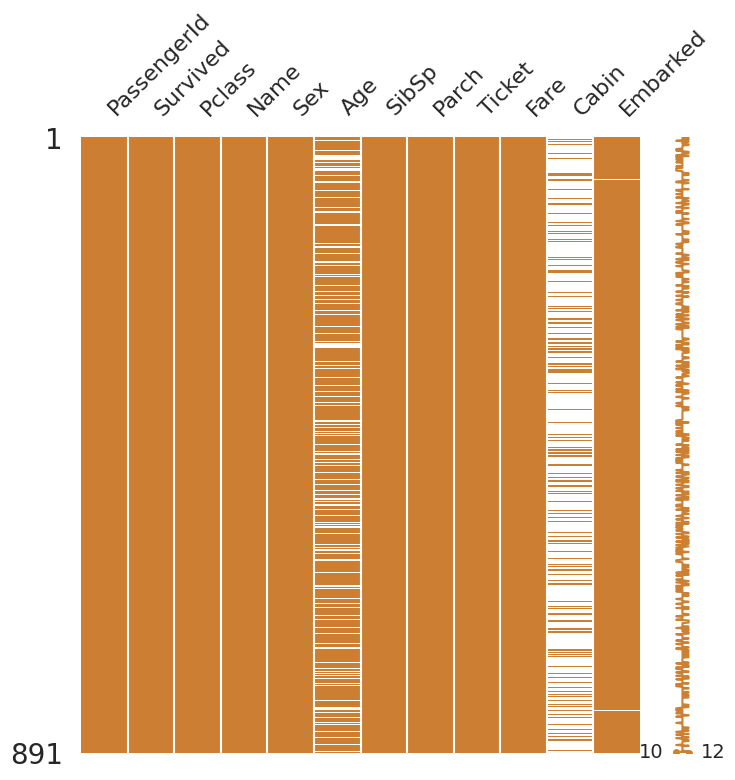

In [14]:
msno.matrix(df=df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

<Axes: >

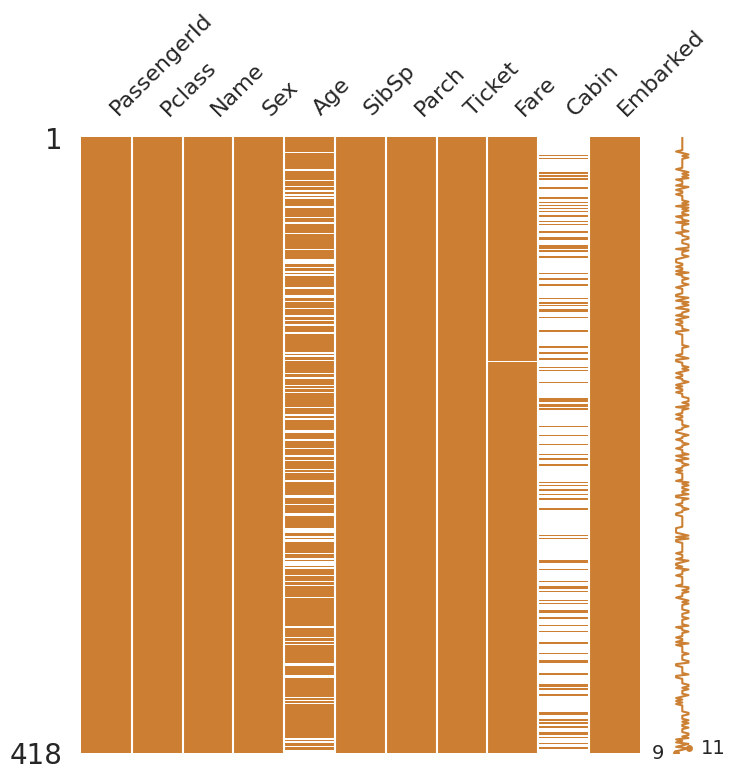

In [15]:
msno.matrix(df=df_test.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

<Axes: >

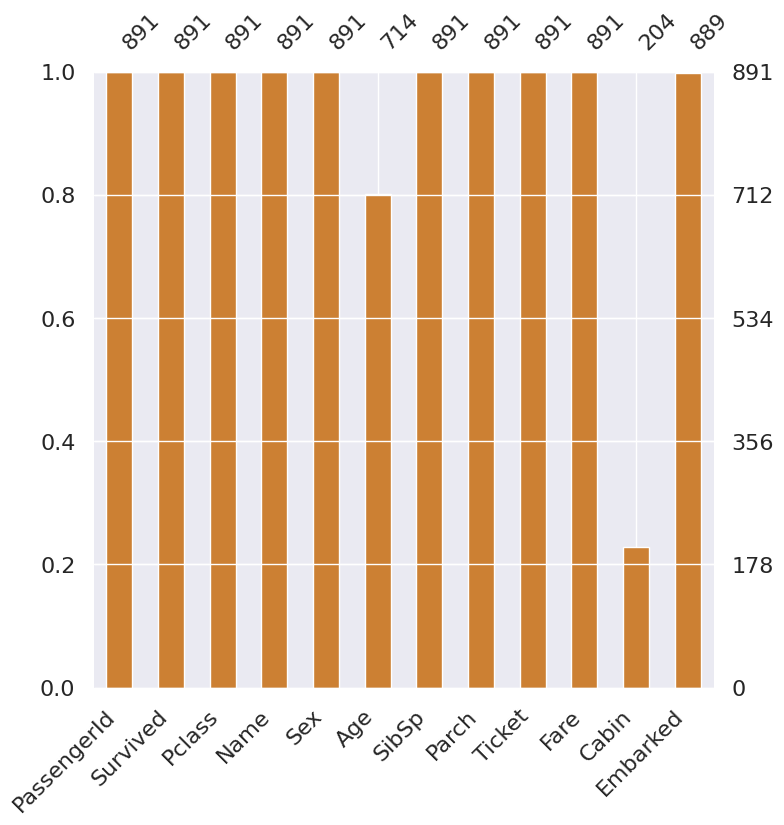

In [16]:
msno.bar(df=df_train.iloc[:,:], figsize = (8,8), color = (0.8, 0.5, 0.2))

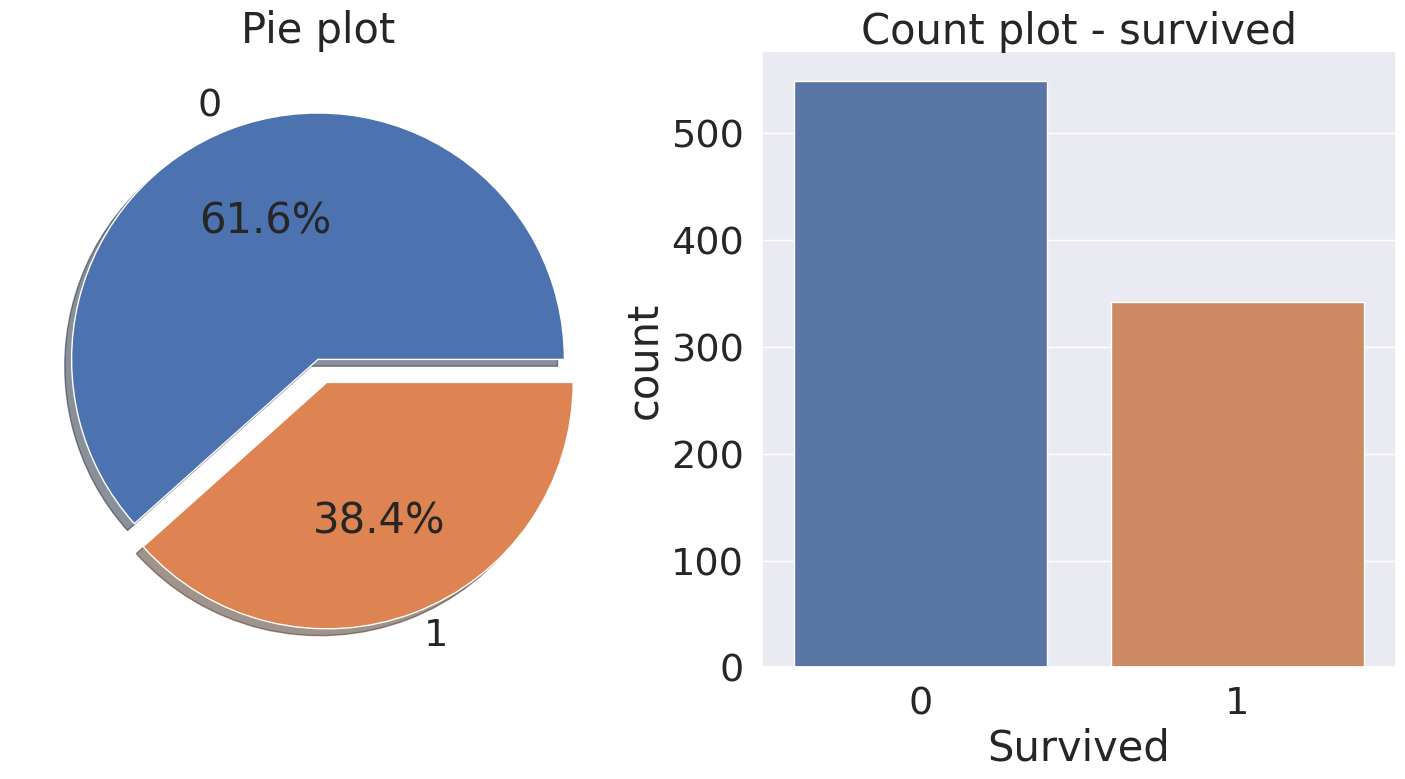

In [18]:
f,ax = plt.subplots(1,2,figsize=(18,8))

df_train["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct = "%1.1f%%", ax= ax[0], shadow=True)
ax[0].set_title("Pie plot")
ax[0].set_ylabel("")

sns.countplot(x="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Count plot - survived")

plt.show()

In [19]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
pd.crosstab(df_train["Pclass"], df_train["Survived"], margins = True).style.background_gradient(cmap = "summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

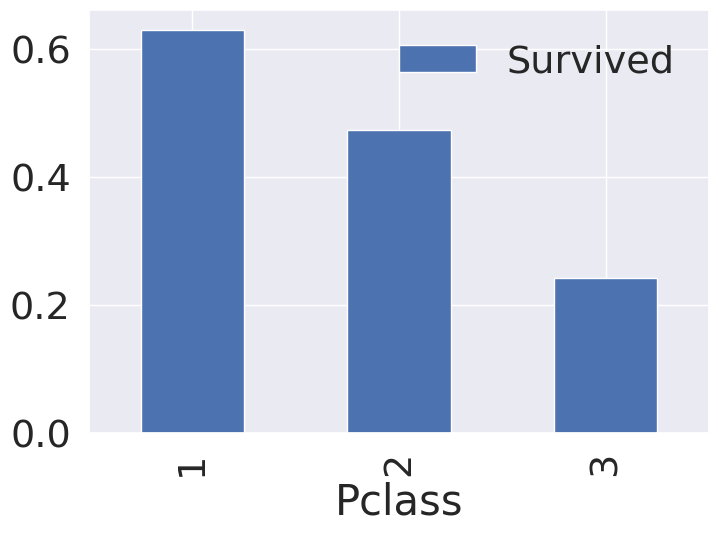

In [24]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar()

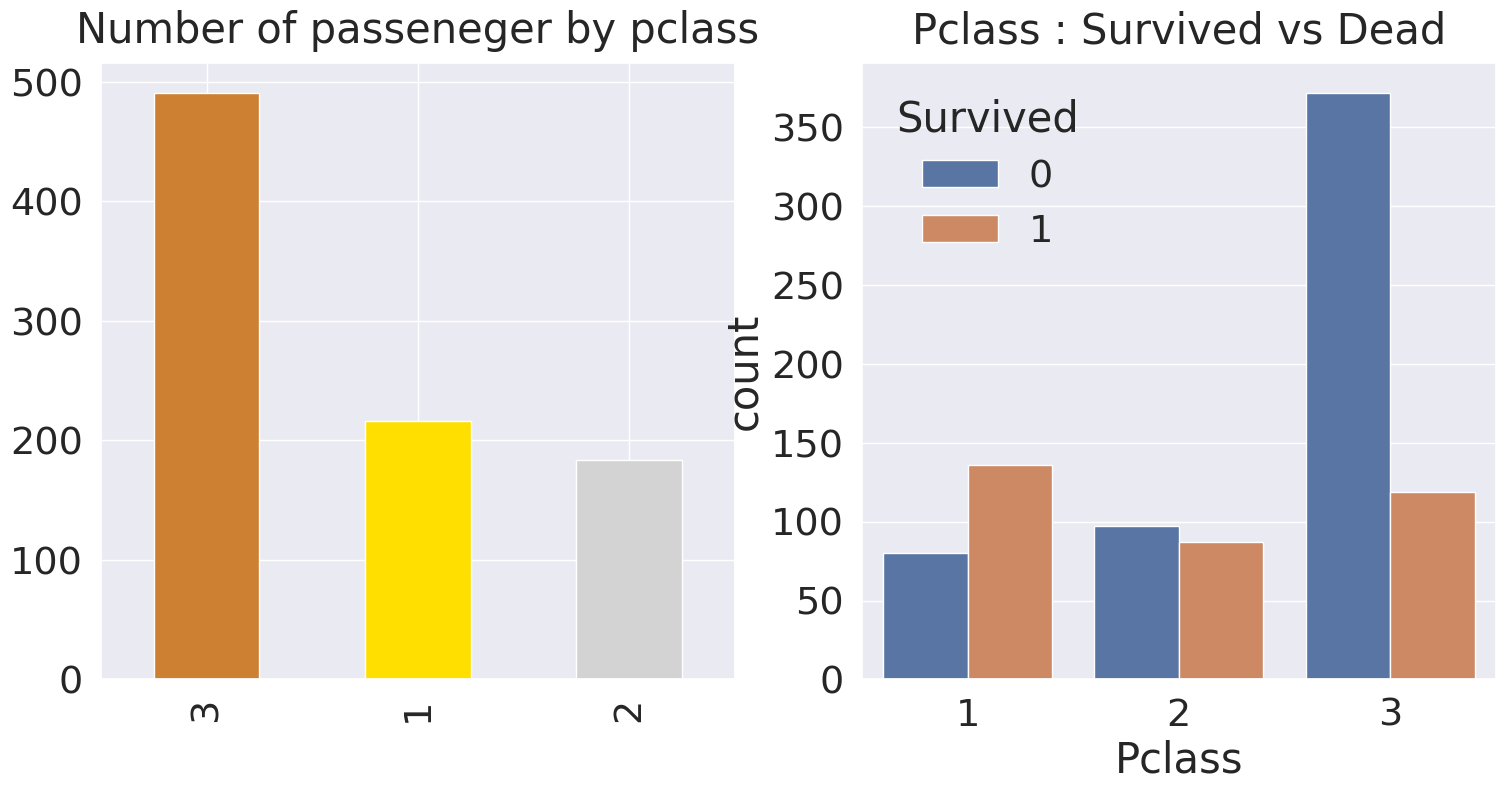

In [26]:
y_position = 1.02
f,ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title("Number of passeneger by pclass", y= y_position)
ax[0].set_ylabel

sns.countplot(x = "Pclass", hue="Survived", data = df_train, ax= ax[1])
ax[1].set_title("Pclass : Survived vs Dead", y= y_position)
plt.show()

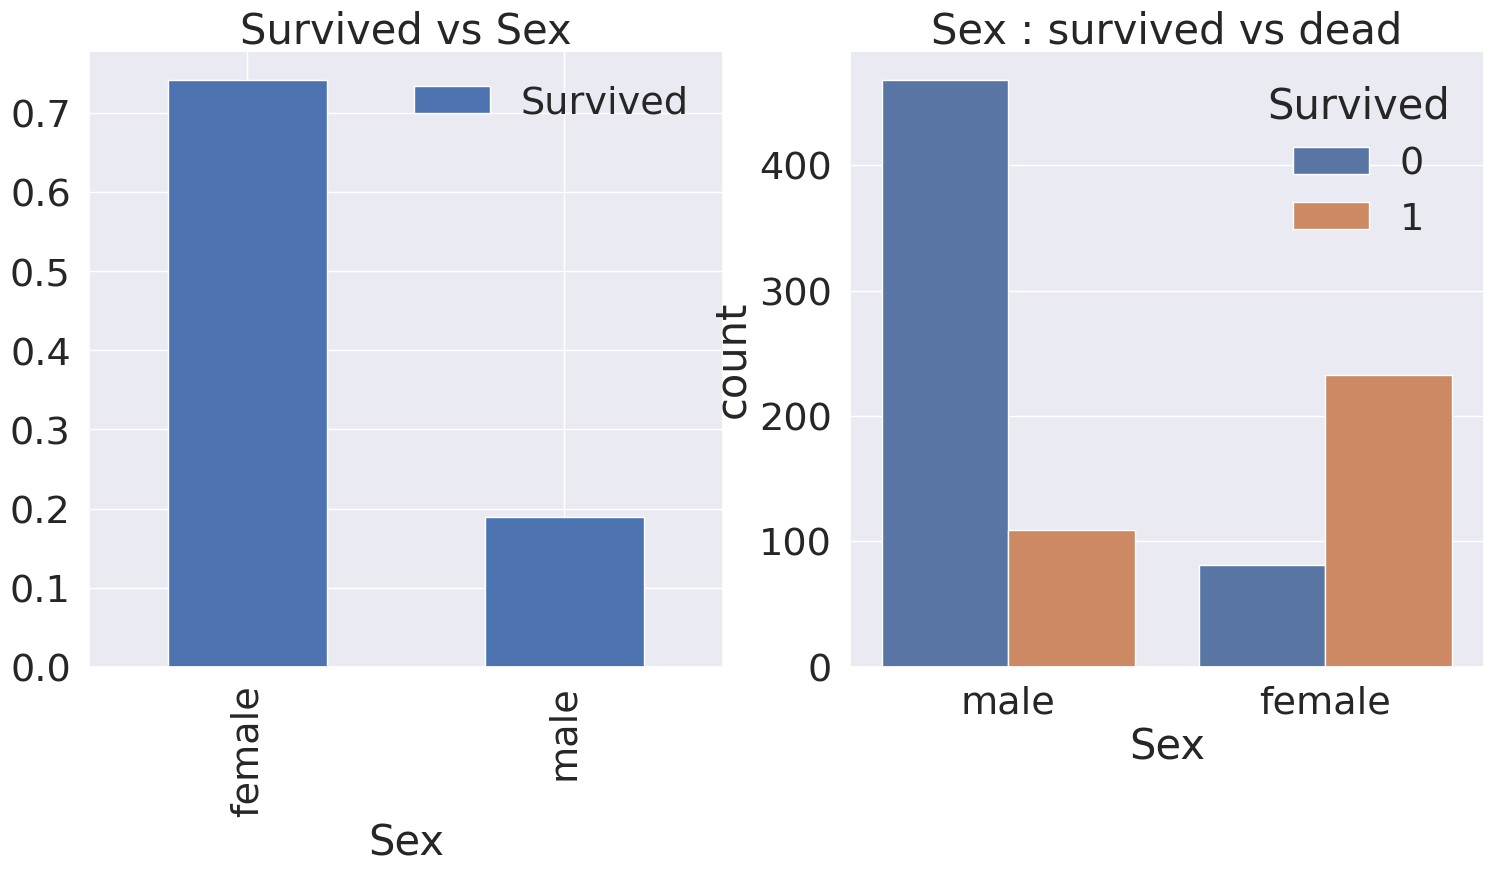

In [27]:
f,ax = plt.subplots(1,2, figsize = (18,8))
df_train[["Sex", "Survived"]].groupby(["Sex"], as_index= True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")

sns.countplot(x="Sex", hue = "Survived" , data = df_train, ax=ax[1])
ax[1].set_title("Sex : survived vs dead")
plt.show()

In [29]:
df_train[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
pd.crosstab(df_train["Sex"], df_train["Survived"], margins= True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


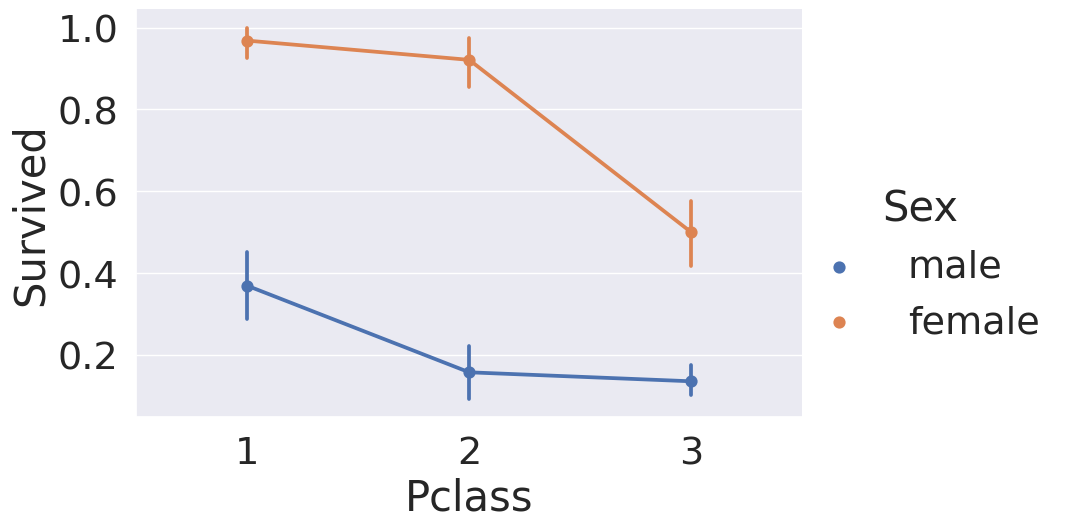

In [33]:
sns.catplot(x="Pclass", y = "Survived", hue= "Sex", data =df_train, height=6, aspect=1.5, kind="point")

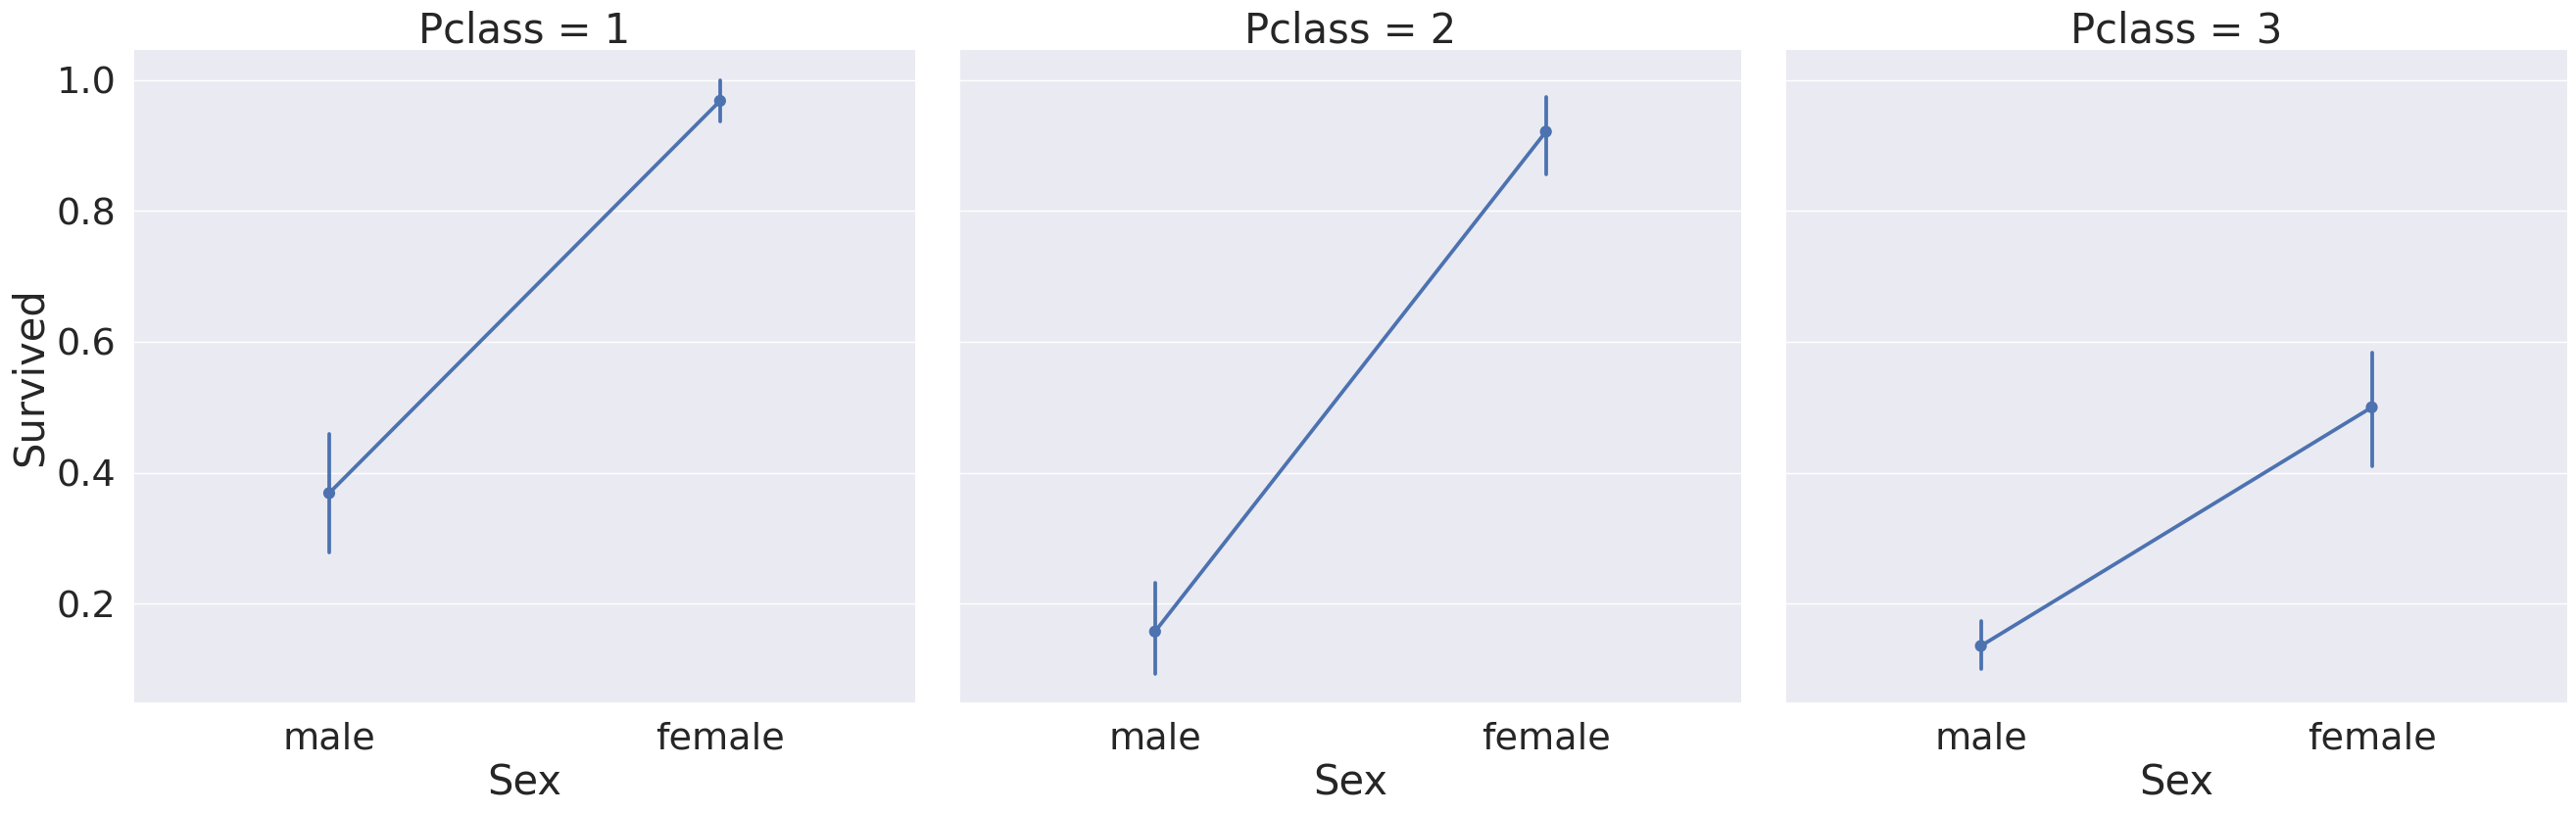

In [37]:
sns.catplot(x="Sex", y= "Survived", col= "Pclass", data = df_train, height=9, aspect=1, kind="point")

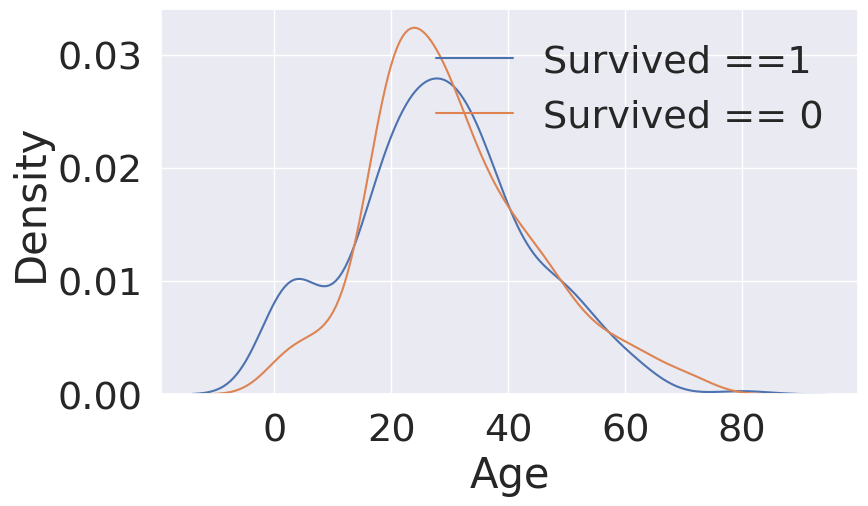

In [38]:
fig,ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train["Survived"] ==1 ]["Age"], ax=ax)
sns.kdeplot(df_train[df_train["Survived"] == 0]["Age"], ax=ax)
plt.legend(["Survived ==1", "Survived == 0"])
plt.show()

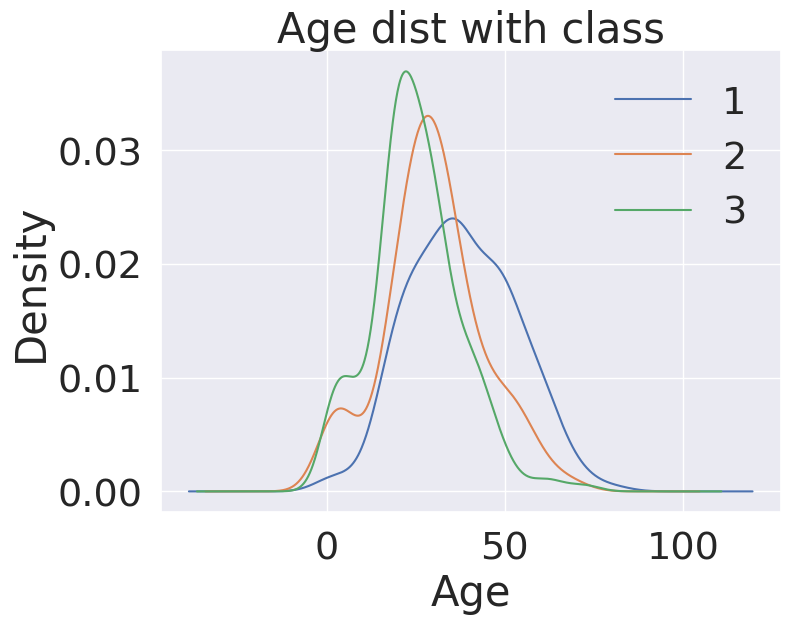

In [40]:
plt.figure(figsize=(8,6))
df_train["Age"][df_train["Pclass"] ==1].plot(kind="kde")
df_train["Age"][df_train["Pclass"] ==2].plot(kind="kde")
df_train["Age"][df_train["Pclass"] ==3].plot(kind="kde")

plt.xlabel("Age")
plt.title("Age dist with class")
plt.legend(["1", "2", "3"])

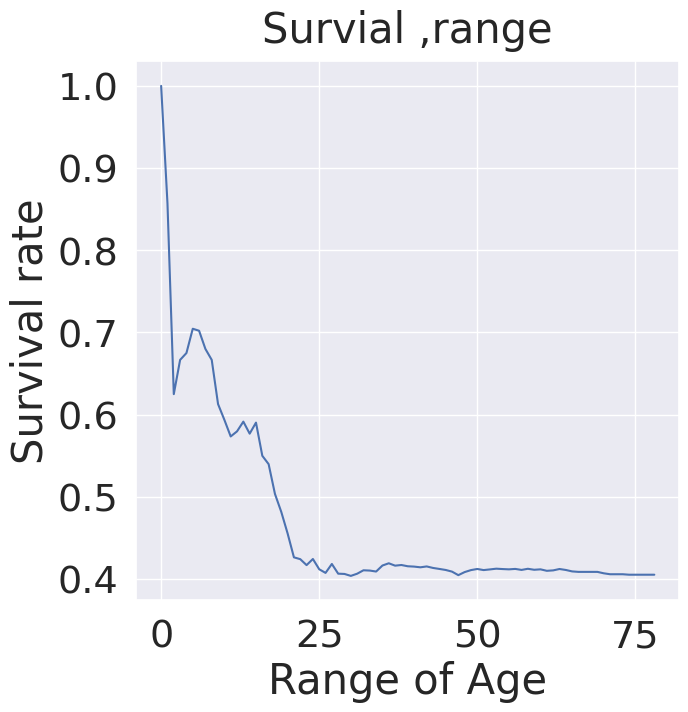

In [41]:
cummulate_survival_ratio = []
for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train["Age"] < i]["Survived"].sum()/ len(df_train[df_train["Age"] <i]["Survived"]))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title("Survial ,range", y = 1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age")
plt.show()

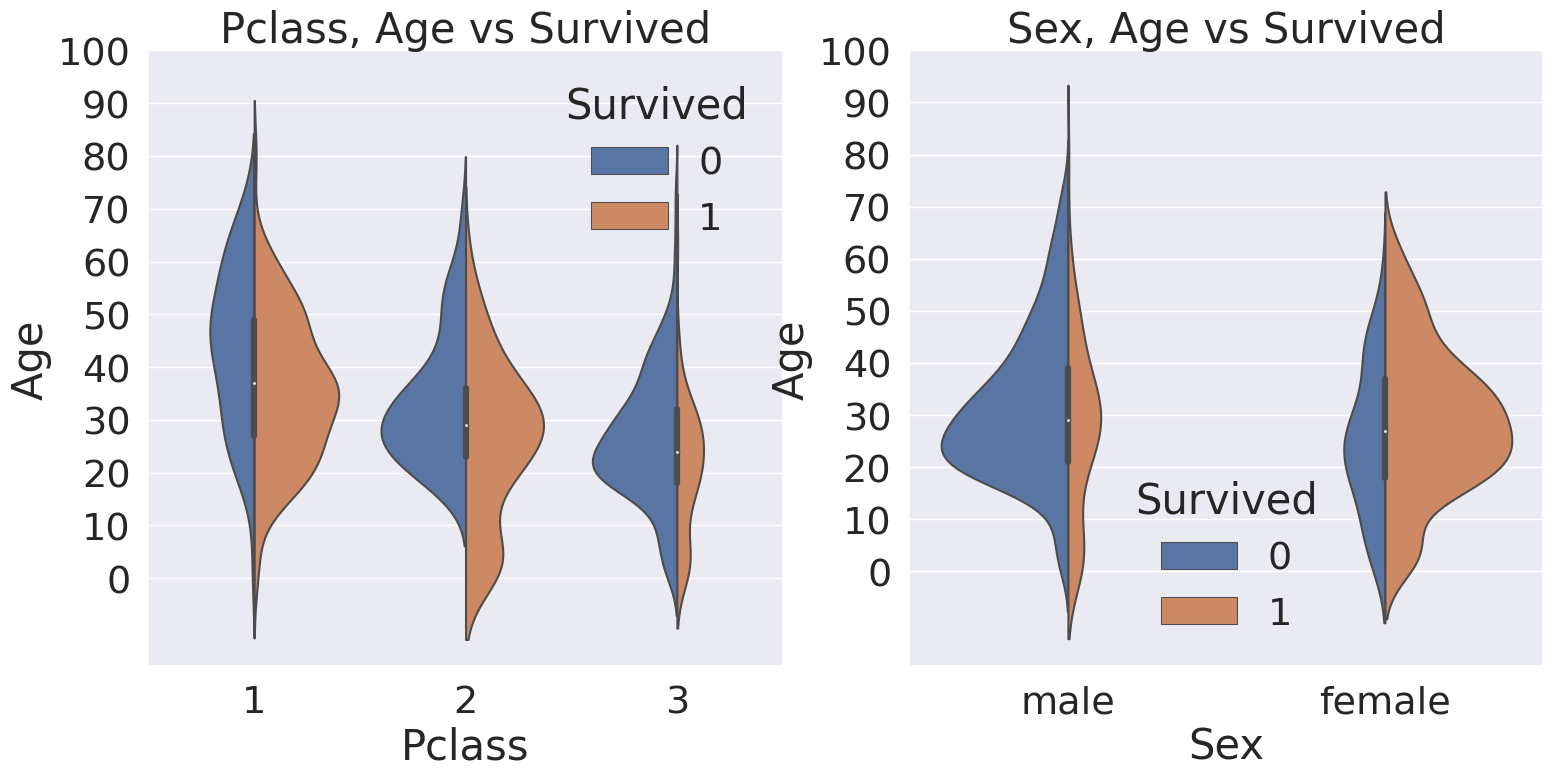

In [46]:
f, ax = plt.subplots(1,2, figsize= (18,8))
sns.violinplot(x = "Pclass", y= "Age", hue = "Survived", data = df_train,scale = "count", split=True, ax=ax[0])
ax[0].set_title("Pclass, Age vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x = "Sex", y= "Age", hue = "Survived", data = df_train,scale = "count", split=True, ax=ax[1])
ax[1].set_title("Sex, Age vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

<Axes: xlabel='Embarked'>

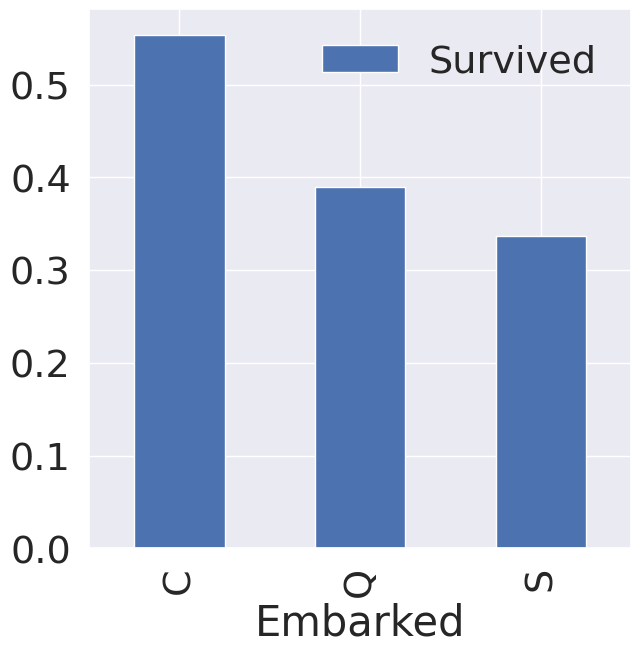

In [47]:
f,ax = plt.subplots(1,1,figsize=(7,7))
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(
    by = "Survived", ascending = False
).plot.bar(ax=ax)

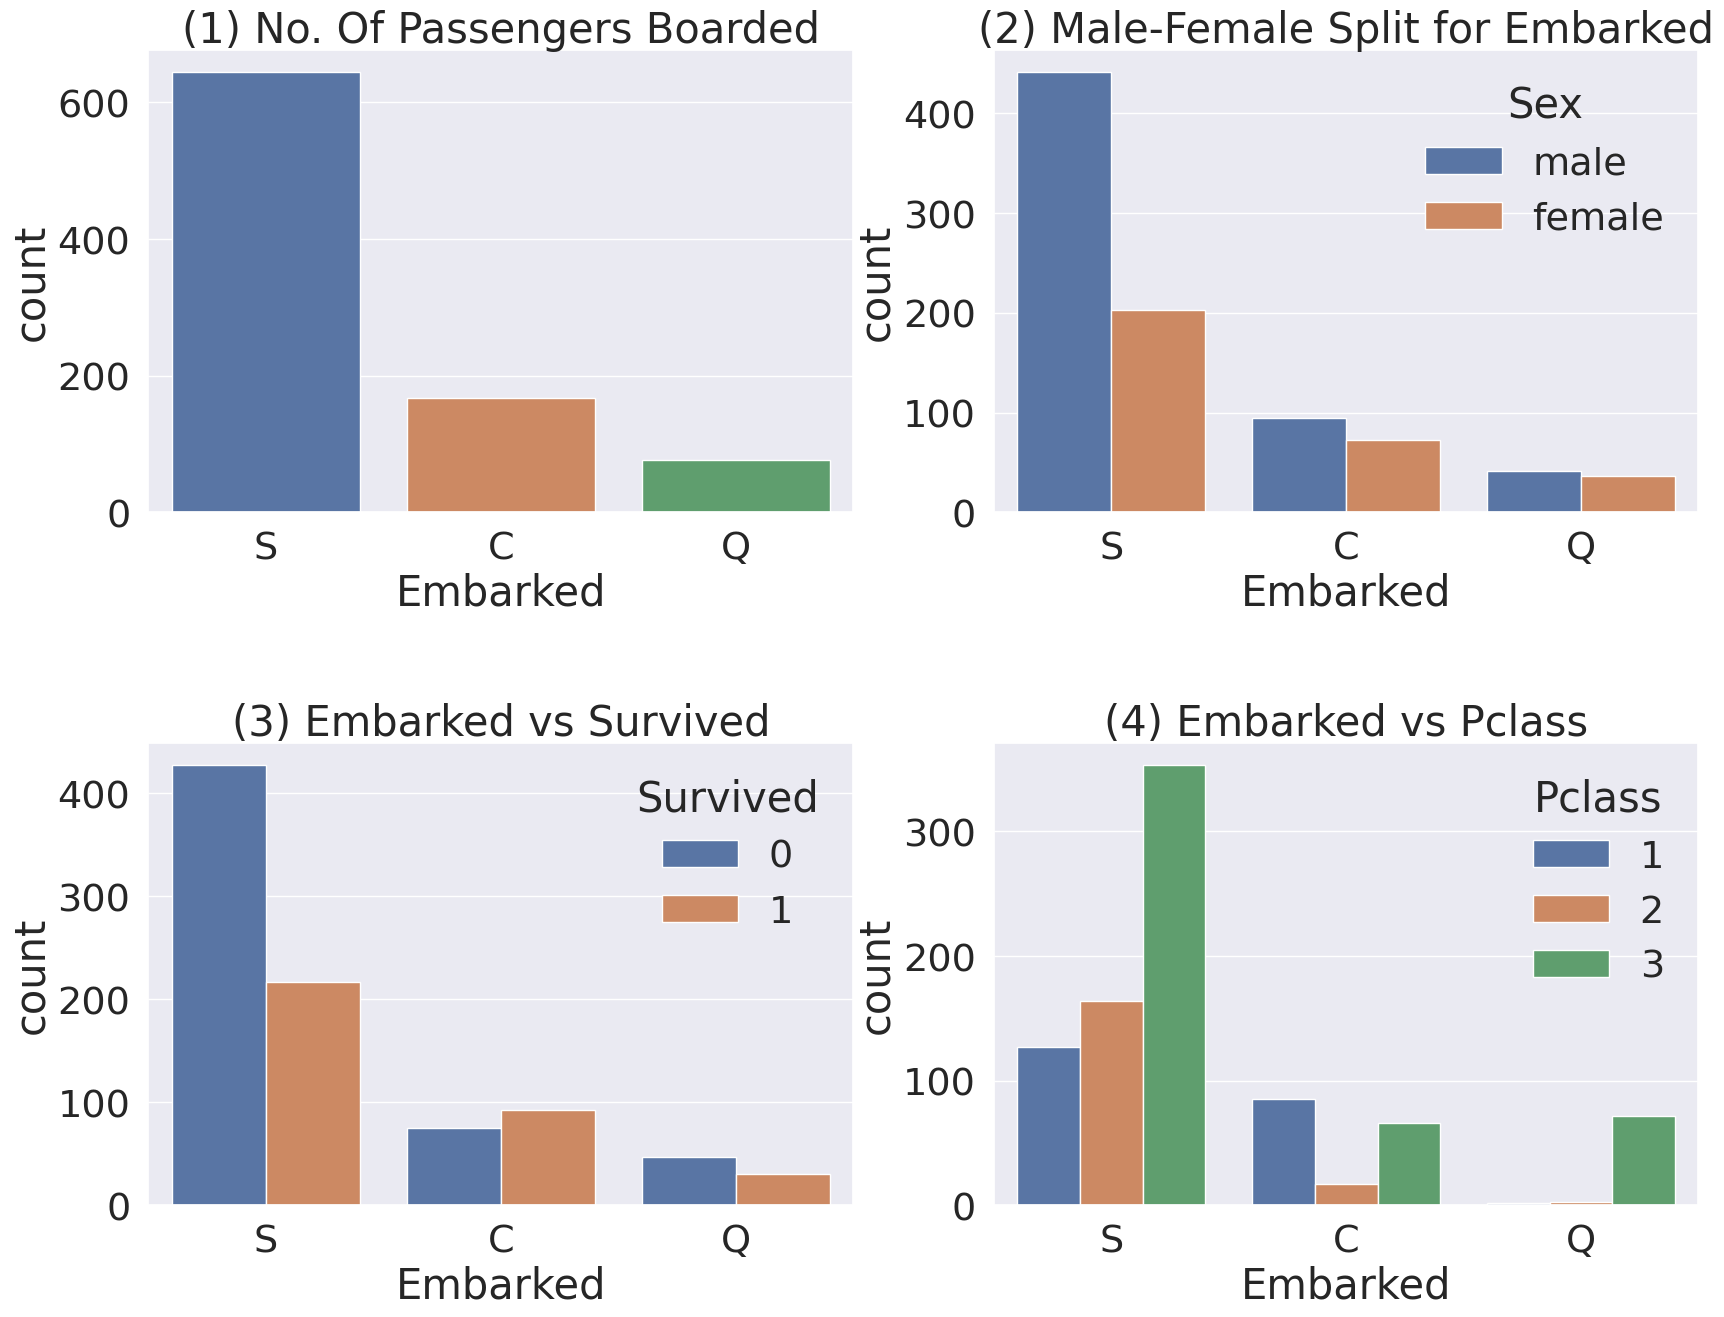

In [49]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x = 'Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x = 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot(x = 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [50]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

In [51]:
print(df_train["FamilySize"].max())
print(df_train["FamilySize"].min())

11
1


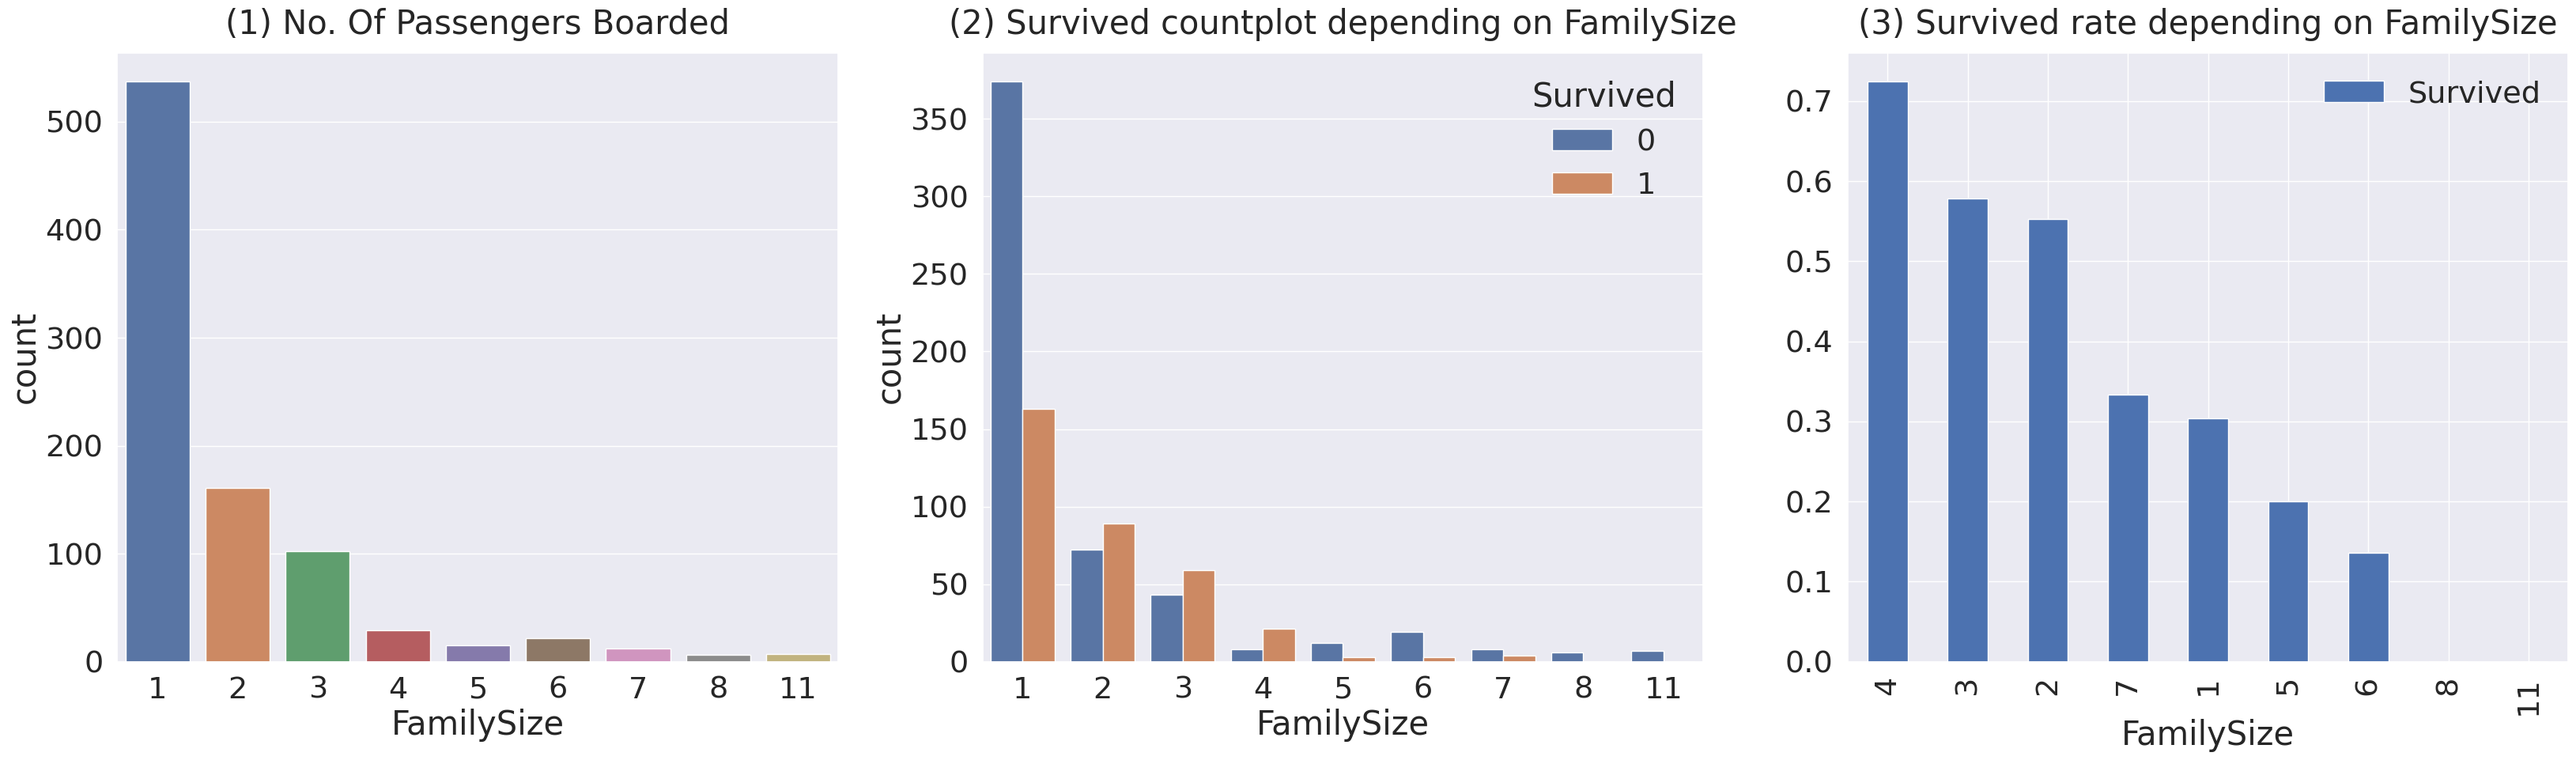

In [52]:
f,ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot(x="FamilySize", data =df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x="FamilySize", data= df_train, hue= "Survived", ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean().sort_values(
    by= "Survived", ascending =False
).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace= 0.5)
plt.show()

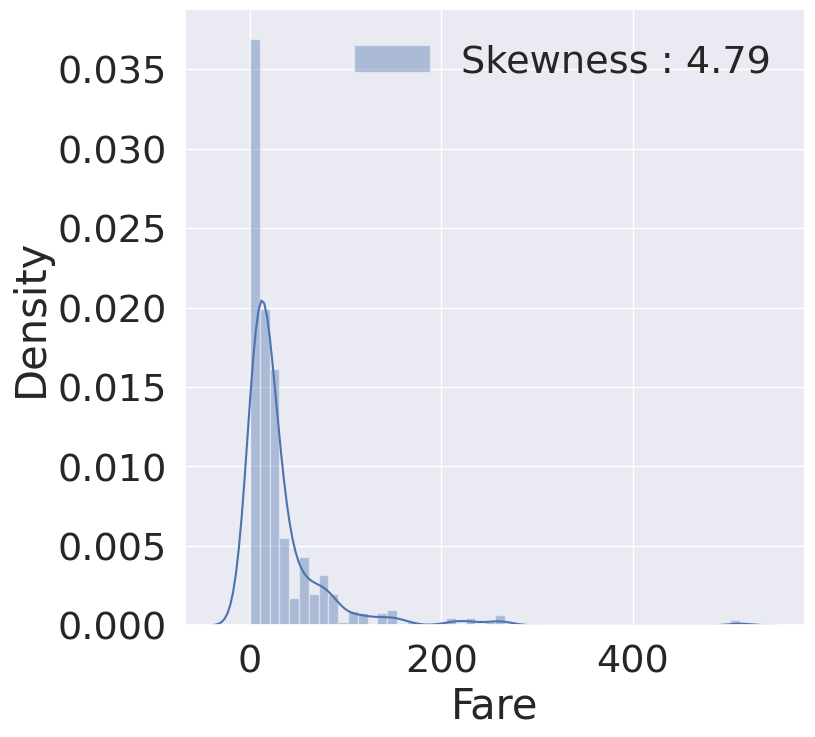

In [53]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train["Fare"], color="b", label="Skewness : {:.2f}".format(df_train["Fare"].skew()), ax= ax)
g = g.legend(loc="best")

In [54]:
df_test.loc[df_test.Fare.isnull(), "Fare"] = df_test["Fare"].mean()

df_train["Fare"] = df_train["Fare"].map(lambda i:np.log(i) if i >0 else 0)
df_test["Fare"] = df_test["Fare"].map(lambda i:np.log(i) if i >0 else 0)


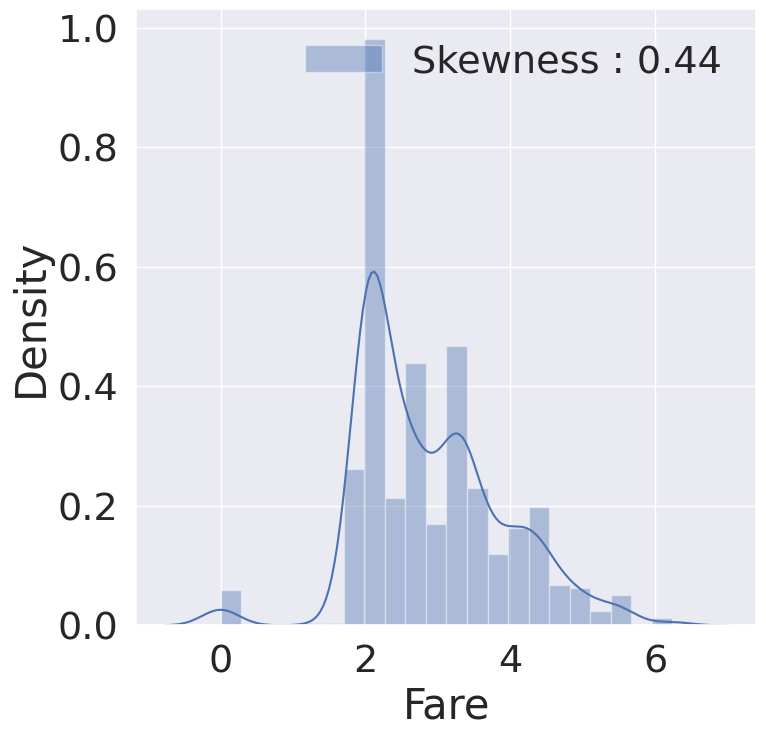

In [56]:
fig, ax= plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train["Fare"], color="b", label = "Skewness : {:.2f}".format(df_train["Fare"].skew()),ax = ax)
g = g.legend(loc="best")